In [67]:
import pandas as pd
import time
from datetime import datetime
import numpy as np
import plotly.express as px
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
#from webdriver_manager.chrome import ChromeDriverManager

In [69]:
# Function to fetch data and generate treemap
def fetch_and_plot():
    # Declare browser
    chrome_driver_path = '/home/user/Downloads/chromedriver-linux64/chromedriver'
    #change "user" to your pc user
    service = Service(chrome_driver_path)# Create a Service object
    driver = webdriver.Chrome(service=service) # Pass the Service object to the webdriver.Chrome

    #define url of page to exract data from
    url='https://coinmarketcap.com/gainers-losers/'
    driver.get(url)
    time.sleep(5) #Sleep for few seconds so, by that time, the webpage gets loaded.
    ranking =  driver.find_elements(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div/div[2]/div/div[1]/div/table')# get element by XPATH from element selection in inspect mode

    """ rec =  [s.text for s in ranking] + rec #this will return ['#\nName\nPrice\n24h\nVolume(24h)
    print(rec) """

    data = []  # Extract data
    for index, rank in enumerate(ranking):
        rowData = rank.text.split('\n')
        #print(rowData) #This prints the extracted data all in a single row
        data.append(rowData)
    '''print(rowData)'''

    #Resahaping the data list to # cols, should be indented or not?
    lst1 = rowData[5:] #popping headers
    expectedRows = len(lst1) // 4 #divide the list by no of expected cols to get no of expected rows
    lst = np.array(lst1)#turning the simngle rowdata list into an array
    reshpd = lst.reshape(int(expectedRows), 4) #to get row x col
    '''print(reshpd)'''
    reshpdtrimmed = reshpd[:, :-1]#'Price' '24h%' 'Vol(24h)' were merged together so I popped them
    forth = np.array([row[3].split() for row in reshpd])#now splitting 'Price' '24h%' 'Vol(24h)' on their own
    '''print(reshpdtrimmed)'''
    merged = np.concatenate((reshpdtrimmed, forth), axis = 1)#coming together making the perfect array
    '''print(merged)'''
    first10 = np.array(merged[:10])#only need the first 10
    '''print(first10)'''

     #passing to nympy Dataframe to get tabular form
    df = pd.DataFrame(first10, columns=['CmcRank', 'Name', 'Symbol', 'Price', '24h%', 'Vol(24h)'])
    #Initially getting errors of ValueError: 5 columns passed, passed data had 125 columns
    #so needed to break the  cols down into 5
    #print(df)
    timestamp = datetime.utcnow().strftime('%b %d, %Y %H:%M:%S UTC')
    title = f"Top 10 CMC 24h% Increase for {timestamp}"
    display_title = f"**{title}**"
    # Display the title and DataFrame as a Markdown
    from IPython.display import display, Markdown
    display(Markdown(display_title))
    display(df)

    df['24h%'] = df['24h%'].str.rstrip('%').astype(float)

     # Normalize the colors
    fig = px.treemap(
        df,
        path=['Name'],
        values='24h%',
        color='24h%',
        hover_data={'Symbol': True, 'Price': True, 'Vol(24h)': True, '24h%': True},
        color_continuous_scale='Greens',
    )

    timestamp = datetime.utcnow().strftime('%b %d, %Y %H:%M:%S UTC')#timestamp for the plot

        # Customize labels and hover info
    fig.update_traces(
        textinfo='label+text',
        hovertemplate='<b>%{label}</b><br>Symbol: %{customdata[0]}<br>Price: %{customdata[1]}<br>Volume(24h): %{customdata[2]}<br>24h%: %{value}%'
    )

    title= f'Top10 CMC 24h% Increase for {timestamp}'
    display_title = f"**{title}**"
    from IPython.display import display, Markdown
    display(Markdown(display_title))
    #fig.update_layout(title=title, margin=dict(t=50, l=25, r=25, b=25))
    fig.show()

    #driver.quit

**Top 10 CMC 24h% Increase for Jul 01, 2024 13:45:38 UTC**

,CmcRank,Name,Symbol,Price,24h%,Vol(24h)
0,70,Ethereum Name Service,ENS,$31.46,22.04%,"$324,517,915"
1,41,dogwifhat,WIF,$2.25,11.77%,"$446,712,630"
2,80,MultiversX,EGLD,$31.21,9.12%,"$35,184,470"
3,98,Mog Coin,MOG,$0.000001887,7.84%,"$44,370,411"
4,82,Beam,BEAM,$0.01703,7.81%,"$12,608,286"
5,54,Bonk,BONK,$0.00002371,7.63%,"$200,854,315"
6,48,Bittensor,TAO,$277.86,7.62%,"$38,464,776"
7,40,Immutable,IMX,$1.58,7.42%,"$61,520,993"
8,56,Brett (Based),BRETT,$0.1607,6.35%,"$48,797,288"
9,39,Maker,MKR,"$2,606.89",6.11%,"$74,191,198"


**Top10 CMC 24h% Increase for Jul 01, 2024 13:45:38 UTC**

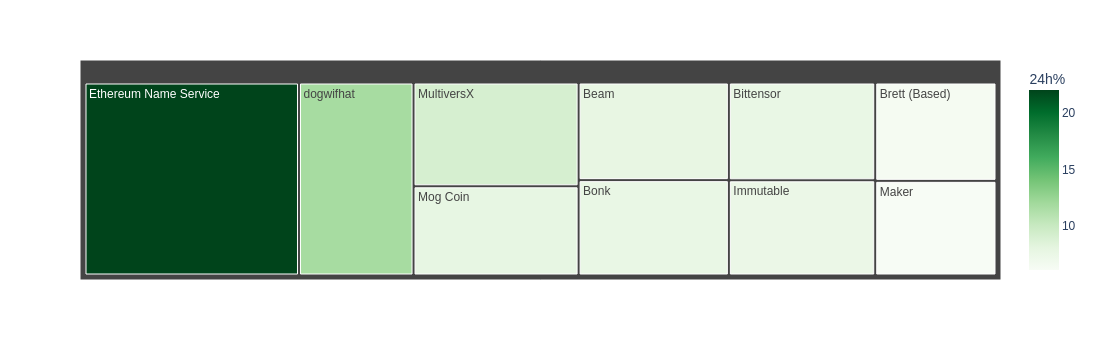

**Top 10 CMC 24h% Increase for Jul 01, 2024 13:46:08 UTC**

,CmcRank,Name,Symbol,Price,24h%,Vol(24h)
0,70,Ethereum Name Service,ENS,$31.46,22.04%,"$324,517,915"
1,41,dogwifhat,WIF,$2.25,11.77%,"$446,712,630"
2,80,MultiversX,EGLD,$31.21,9.12%,"$35,184,470"
3,98,Mog Coin,MOG,$0.000001887,7.84%,"$44,370,411"
4,82,Beam,BEAM,$0.01703,7.81%,"$12,608,286"
5,54,Bonk,BONK,$0.00002371,7.63%,"$200,854,315"
6,48,Bittensor,TAO,$277.86,7.62%,"$38,464,776"
7,40,Immutable,IMX,$1.58,7.42%,"$61,520,993"
8,56,Brett (Based),BRETT,$0.1607,6.35%,"$48,797,288"
9,39,Maker,MKR,"$2,606.89",6.11%,"$74,191,198"


**Top10 CMC 24h% Increase for Jul 01, 2024 13:46:08 UTC**

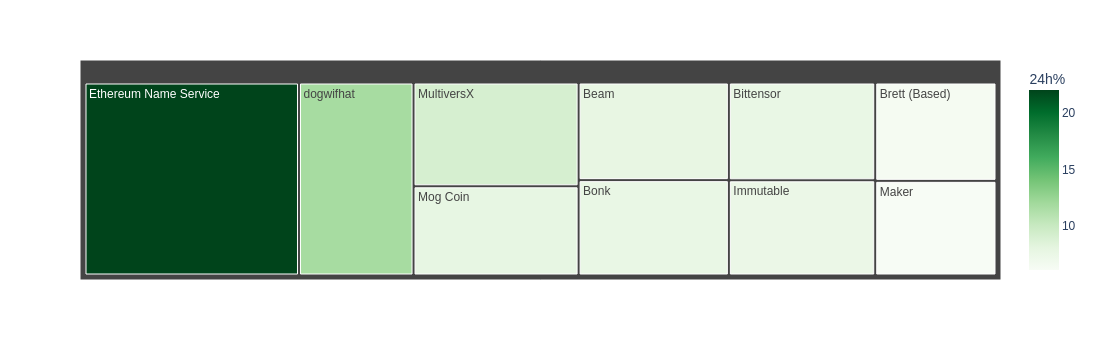

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=126.0.6478.114)
Stacktrace:
#0 0x562d7093b69a <unknown>
#1 0x562d7061e0dc <unknown>
#2 0x562d705f3384 <unknown>
#3 0x562d70695d3d <unknown>
#4 0x562d706abf66 <unknown>
#5 0x562d7068d613 <unknown>
#6 0x562d7065d4f7 <unknown>
#7 0x562d7065de4e <unknown>
#8 0x562d7090186b <unknown>
#9 0x562d70905911 <unknown>
#10 0x562d708ed35e <unknown>
#11 0x562d70906472 <unknown>
#12 0x562d708d1cbf <unknown>
#13 0x562d7092b098 <unknown>
#14 0x562d7092b270 <unknown>
#15 0x562d7093a7cc <unknown>
#16 0x7fac3f8b8ea7 start_thread


In [71]:
try:
    while True:
        fetch_and_plot()
        time.sleep(15)
except KeyboardInterrupt:
    print("Stopped by user")